In [1]:

import numpy as np
import matplotlib.pyplot as plt 
import lifelines
from myfunctions import PlottingLL  
from myfunctions import CureModelLL
from myfunctions import SevenPlot


stime_mu_0_5 = np.load('stime_eb25_ap25_Mu0.50_Np30_logsp1.npy')
stime_mu_0_3 = np.load('stime_eb25_ap25_Mu0.30_Np30_logsp1.npy')
stime_mu_0_1 = np.load('stime_eb25_ap25_Mu0.10_Np30_logsp1.npy')

stime = stime_mu_0_5
mu = 0.5

Ne, Na, Nm, Np = 25,25,1,30

#binary semi-major axis
ab = 1

#binary eccentricity
ebs = np.linspace(0.,0.7,Ne)
#print(ebs)
    
#test particle semi- major axis 
aps = ab*np.linspace(1.,5.,Na)


len_eb = []
start_eb = 0
end_eb = 25
inc_eb= 1

for x in range(start_eb,end_eb,inc_eb):    
#     print(round(ebs[x],3))
    len_eb.append(ebs[x])
    
print("len of ebs = {}".format(len(len_eb)))


len_ap = []
start_ap = 0
end_ap = 25
inc_ap = 1

for y in range(start_ap,end_ap,inc_ap):    
#     print(aps[y])
    len_ap.append(aps[y])
    
print("len of aps = {}".format(len(len_ap)))

    

len of ebs = 25
len of aps = 25


In [2]:

# p_s = []
# lambda_s = []
# ap_s = []
# p_se0 = []
# lambda_se0 = []

# #For 25 eb values and 25 ap values 
# for x in range(start_eb,end_eb,inc_eb):
#     pv, lambdav = 0,1
#     for y in range(start_ap,end_ap,inc_ap):
#         p_, lambda_, p_se= pv + 1, lambdav + 1, pv + 0.1
#         p_s.append(p_)
#         lambda_s.append(lambda_)         
#         p_se0.append(p_se)
# #         lambda_se0.append(lambda_se)
#         ap_s.append(round(aps[y],3))
#         pv, lambdav = p_, lambda_

# print(p_s)
# print(lambda_s)
# print(p_se0)


In [3]:
#Binary reduced mass

p_s = []
lambda_s = []
ap_s = []
p_se0 = []
lambda_se0 = []

#For 25 eb values and 25 ap values 
for x in range(start_eb,end_eb,inc_eb):
    pv, lambdav = 0,0
    for y in range(start_ap,end_ap,inc_ap):
        p_, lambda_, p_se= CureModelLL.CureModelLL(np.abs(ebs[x]),aps[y],mu,stime[x,y,:],Np, pv, lambdav)
        #p_se
        p_s.append(p_)
        lambda_s.append(lambda_)         
        p_se0.append(p_se)
#         lambda_se0.append(lambda_se)
        ap_s.append(round(aps[y],3))
#         pv, lambdav = p_, lambda_
        pv, lambdav = p_, min(lambda_,1000)
#         print(pv, lambdav, p_se)

    
print(p_s)
print(lambda_s)
print(p_se0)

# p_s = list(np.concatenate(p_s).flat)
# lambda_s = list(np.concatenate(lambda_s).flat)
# p_se0 = list(np.concatenate(p_se0).flat)  #p_ standard error
# lambda_se0 = list(np.concatenate(lambda_se0).flat) #lambda_ standard error
# print(p_se0)
# print(p_s)


#Each segment = num of 'ap' values
ap_seg = []
p_seg = []
lambda_seg = []
p_se0_seg = [] #p_ standard error segment 
# lambda_se0_seg = [] #lambda_ standard error segment 




# For each seperate segment of p_ and ap_s values (one for each eb value)
for i in range(int(len(len_ap)*len(len_eb)/len(len_ap))):
    p_seg.append(p_s[i*len(len_ap):(i+1)*len(len_ap)])
    lambda_seg.append(lambda_s[i*len(len_ap):(i+1)*len(len_ap)])
    
    p_se0_seg.append(p_se0[i*len(len_ap):(i+1)*len(len_ap)])
#     lambda_se0_seg.append(lambda_se0[i*len(len_ap):(i+1)*len(len_ap)])
    
    ap_seg.append(ap_s[i*len(len_ap):(i+1)*len(len_ap)])

# print(lambda_seg[1])
 


/cita/h/home-2/namulla/A1/SURP INTRO PROJECT/Jupyter Notebooks/myfunctions/CureModel.py:12: RuntimeWarning: divide by zero encountered in true_divide
  sf = np.exp(-(T / lambda_))
/cita/modules/python/3.10.2/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in true_divide
  return f_raw(*args, **kwargs)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in true_divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:75: RuntimeWarning: invalid value encountered in multiply
  defvjp(anp.exp,    lambda ans, x : lambda g: ans * g)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py

/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/h/home-2/namulla/A1/SURP INTRO PROJECT/Jupyter Notebooks/myfunctions/CureModel.py:12: RuntimeWarning: divide by zero encountered in true_divide
  sf = np.exp(-(T / lambda_))
/cita/modules/python/3.10.2/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in true_divide
  return f_raw(*args, **kwargs)
/cita/modules/pyth

/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/h/home-2/namulla/A1/SURP INTRO PROJECT/Jupyter Notebooks/myfunctions/CureModel.py:12: RuntimeWarning: divide by zero encountered in true_divide
  sf = np.exp(-(T / lambda_))
/cita/modules/python/3.10.2/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in true_divide
  return f_raw(*args, **kwargs)
/cita/modules/pyth

/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/h/home-2/namulla/A1/SURP INTRO PROJECT/Jupyter Notebooks/myfunctions/CureModel.py:12: RuntimeWarning: divide by zero encountered in true_divide
  sf = np.exp(-(T / lambda_))
/cita/modules/python/3.10.2/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in true_divide
  return f_raw(*args, **kwargs)
/cita/modules/pyth

/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/h/home-2/namulla/A1/SURP INTRO PROJECT/Jupyter Notebooks/myfunctions/CureModel.py:12: RuntimeWarning: divide by zero encountered in true_divide
  sf = np.exp(-(T / lambda_))
/cita/modules/python/3.10.2/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in true_divide
  return f_raw(*args, **kwargs)
/cita/modules/pyth

/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/h/home-2/namulla/A1/SURP INTRO PROJECT/Jupyter Notebooks/myfunctions/CureModel.py:12: RuntimeWarning: divide by zero encountered in true_divide
  sf = np.exp(-(T / lambda_))
/cita/modules/python/3.10.2/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in true_divide
  return f_raw(*args, **kwargs)
/cita/modules/pyth

/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lif

/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lif

/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lif

/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lif

/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lif

/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lif

/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lif

/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lif

/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lif

/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lif

/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lif

/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lif

/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lif

/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lif

/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lif

/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lif

/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lif

/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lif

/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lif

/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lif

[0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999, 0.999999999

/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:985: ApproximationWarning: 
The Hessian for CureFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lif

[20.010073676446453, 0.29868107110352227]
[20.010073676446453, 0.29868107110352227]
[20.010073676446453, 0.29868107110352227]
[20.010073676446453, 0.29868107110352227]
[20.010073676446453, 0.29868107110352227]
[20.010073676446453, 0.29868107110352227]
[20.010073676446453, 0.29868107110352227]
[20.010073676446453, 0.29868107110352227]
[20.010073676446453, 0.29868107110352227]
[20.010073676446453, 0.29868107110352227]
[20.010073676446453, 0.29868107110352227]
[20.010073676446453, 0.29868107110352227]
[20.010073676446453, 0.29868107110352227]
[20.010073676446453, 0.29868107110352227]
[20.010073676446453, 0.29868107110352227]
[20.010073676446453, 0.29868107110352227]
[20.010073676446453, 0.29868107110352227]
[20.010073676446453, 0.29868107110352227]
[20.010073676446453, 0.29868107110352227]
[20.010073676446453, 0.29868107110352227]
[20.010073676446453, 0.29868107110352227]
[20.010073676446453, 0.29868107110352227]
[20.010073676446453, 0.29868107110352227]
[20.010073676446453, 0.29868107110

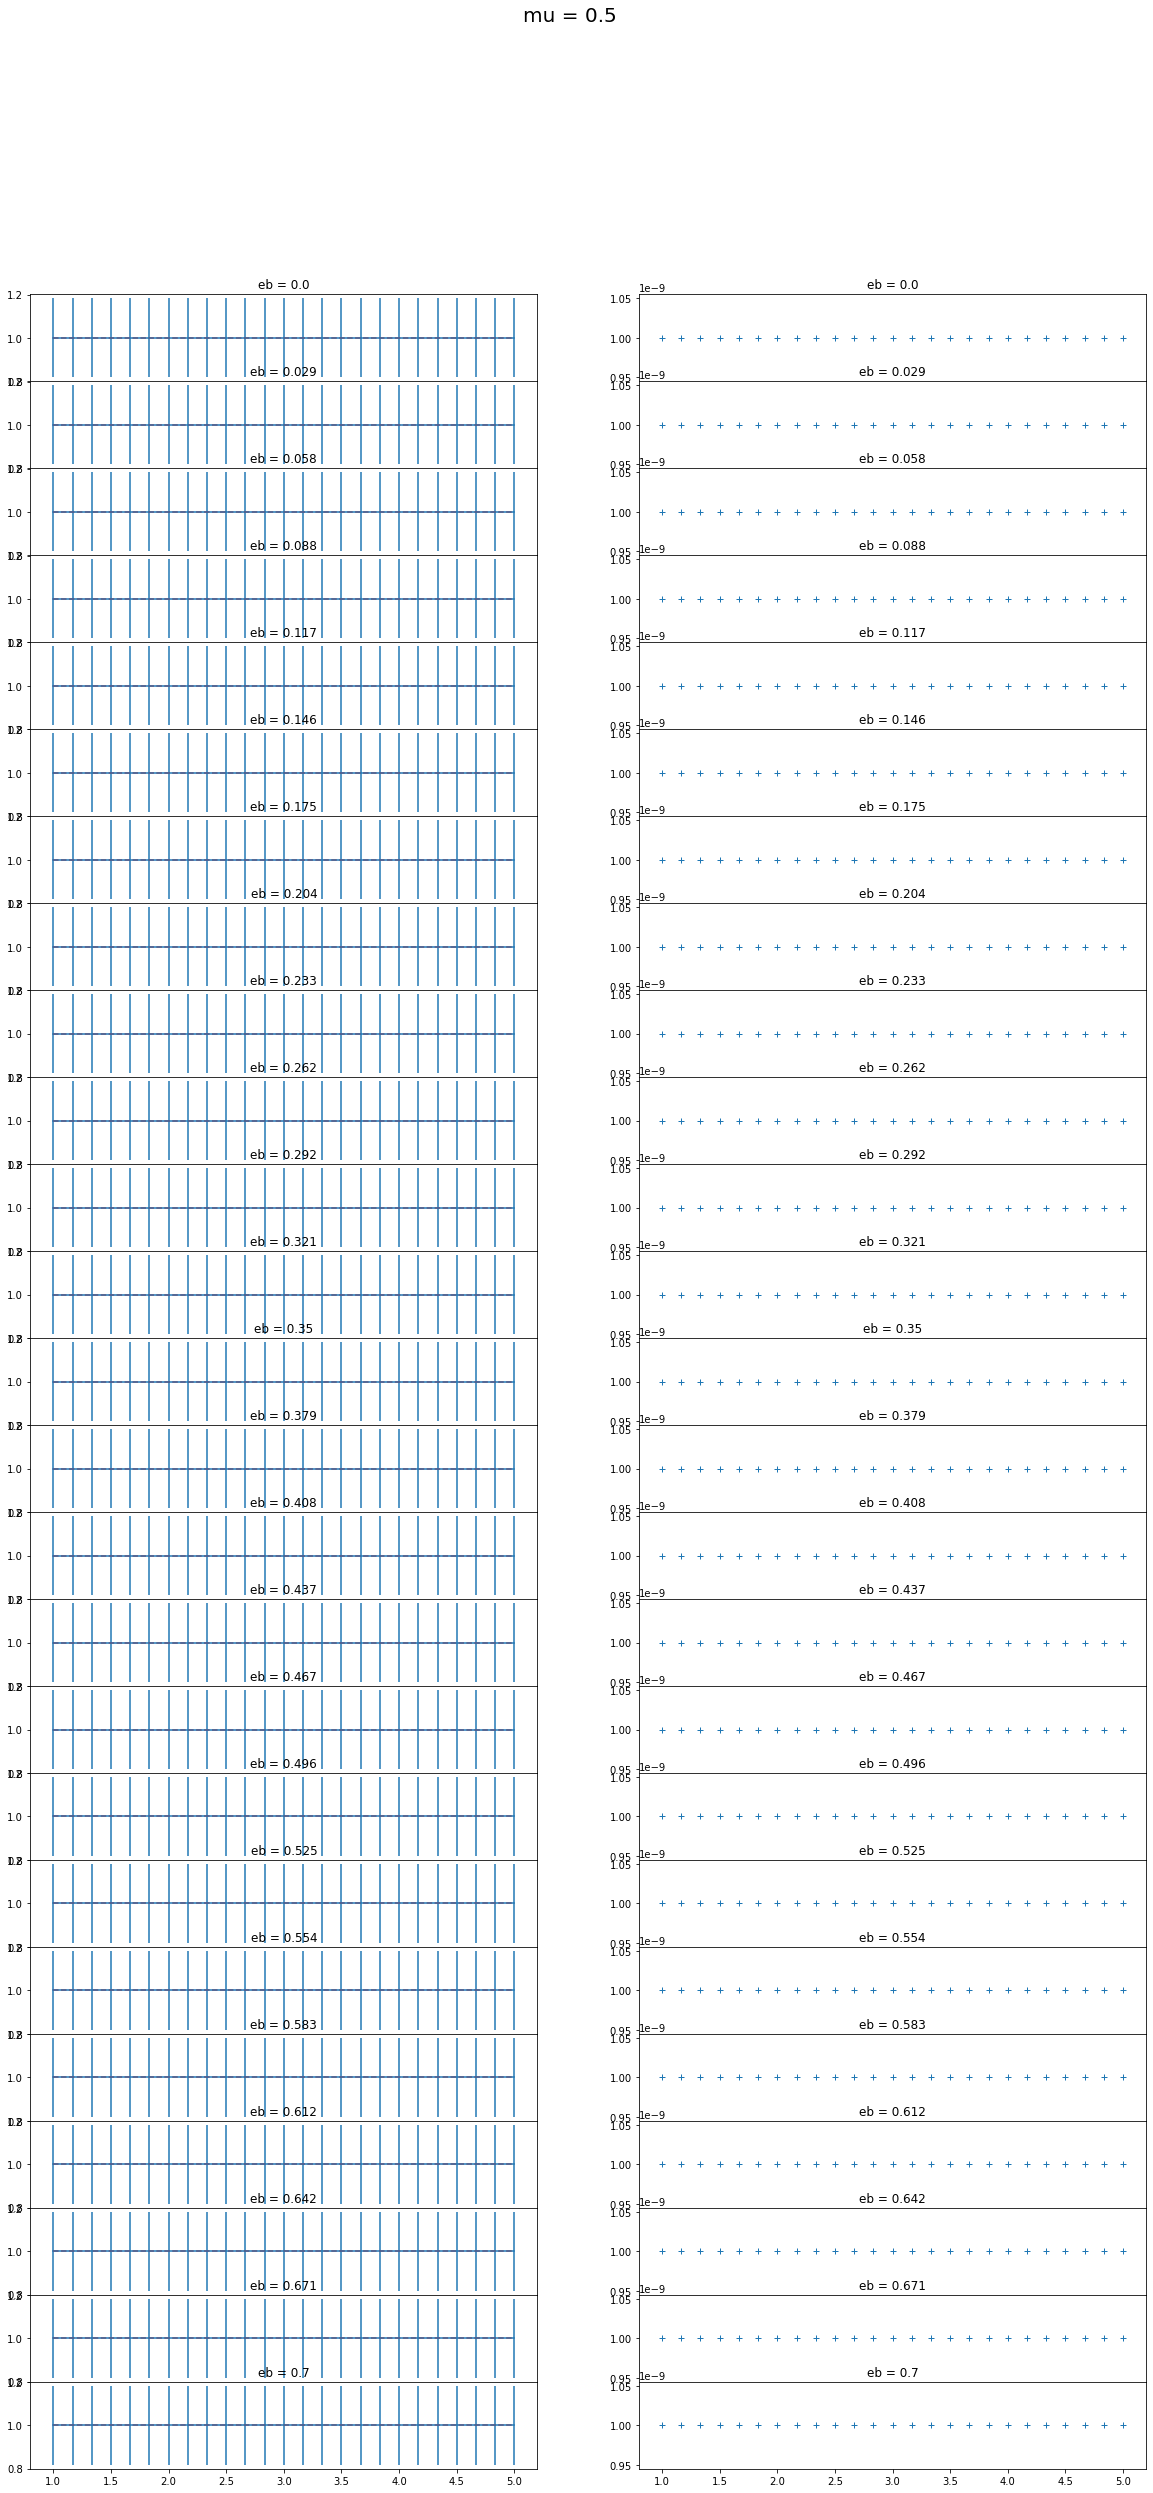

In [4]:
   

#****************EXPIT FUNCTION**********************#
from scipy.optimize import curve_fit
from autograd.scipy.special import expit

#expit(x) = 1/(1+exp(-x))
def expit_reg(x,a,b):
    beta = a + b*x
    return expit(beta)
#*****************************************************#

#PLOTTING

fig = plt.figure(figsize = (20,40))
# fig = plt.figure(figsize = (30,40))

#(10,45)
gs = fig.add_gridspec(len(len_eb),2, hspace=0)
#(len(len_eb), 2)
axs = gs.subplots(sharex=True, sharey=False)
fig.suptitle('mu = {}'.format(mu), size = 20)
p0 = [-30,10]

for i in range(0,len(len_eb),1):
    #************p_*************************#
    axs[i,0].errorbar(ap_seg[i], p_seg[i], xerr = None,yerr = p_se0_seg[i])
#     axs[i,0].plot(ap_seg[i],p_seg[i], '+')

for i in range(0,len(len_eb),1):

#     popt_p, pcov_p = curve_fit(expit_reg, ap_seg[i],p_seg[i],sigma = p_se0_seg[i],p0 = p0, maxfev=5000)
    popt_p, pcov_p = curve_fit(expit_reg, ap_seg[i],p_seg[i],sigma = p_se0_seg[i], p0=p0, maxfev=5000)

    a_p,b_p = popt_p
    x_s_p = np.linspace(1.0,5.0, 100)
    y_s_p = expit_reg(x_s_p, a_p, b_p)
    axs[i,0].plot(x_s_p, y_s_p, '--', color = 'red')
    axs[i,0].set_title('eb = {}'.format(round(len_eb[i],3)))
#     plt.set_suptitle('p_')
    p0 = [a_p,b_p]
    print(p0)

    
#     ************lambda_*********************#
#     axs[i,1].errorbar(ap_seg[i], p_seg[i], xerr = None,yerr = p_se0_seg[i])
#     popt_l, pcov_l = curve_fit(expit_reg, ap_seg[i],lambda_seg[i],maxfev=5000)
#     a_l,b_l = popt_l
#     x_s_l = np.linspace(1.0,5.0, 100)
#     y_s_l = expit_reg(x_s_l, a_l, b_l)
#     axs[i,1].plot(x_s_l, y_s_l, '--', color = 'red')
    axs[i,1].set_title('eb = {}'.format(round(len_eb[i],3)))
#     plt.set_suptitle('lambda')
    axs[i,1].plot(ap_seg[i],lambda_seg[i], '+')
    

# fig.savefig('Curve_fit(expit;mu = {})(eb(0,25,1))(ap(0,25,1))_converge_fail.png'.format(mu), dpi = 250)




#***************************TANH FUNCTION********************************************#

# # def tanh_reg(x,a,b):
# #     beta = a + b*x
# #     return 0.5*(np.tanh(beta)+1)

# # popt1, pcov1 = curve_fit(tanh_reg, ap_s,p_s)
# # print(popt1)
# # a1,b1 = popt1

# # y_s1 = tanh_reg(x_s, a1, b1)
# # axs[0].plot(x_s, y_s1, '--', color = 'green')


#***********************************************************************************#

